## Using FacetGrid, factorplot and lmplot


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Building a FacetGrid

In [2]:
df = pd.read_csv('./dataset/college_datav3.csv')

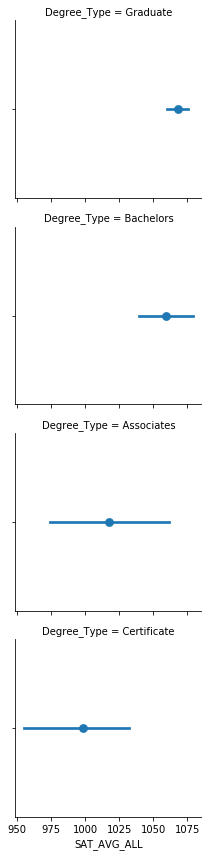

In [8]:
# Create FacetGrid with Degree_Type and specify the order of the rows usiung row_order
g2 = sns.FacetGrid(df, row='Degree_Type',
                  row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL', order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

### Using a factorplot

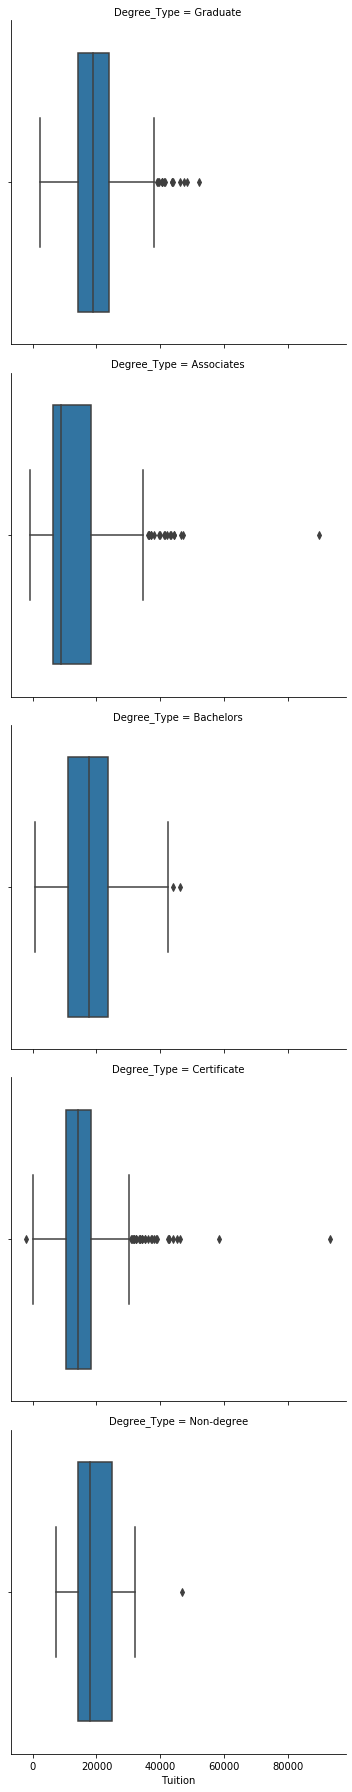

In [6]:
# Create a factorplot(catplot in latest seaborn) that contains boxplots of Tuition values
sns.catplot(data=df,
              x='Tuition',
              kind='box',
              row='Degree_Type')

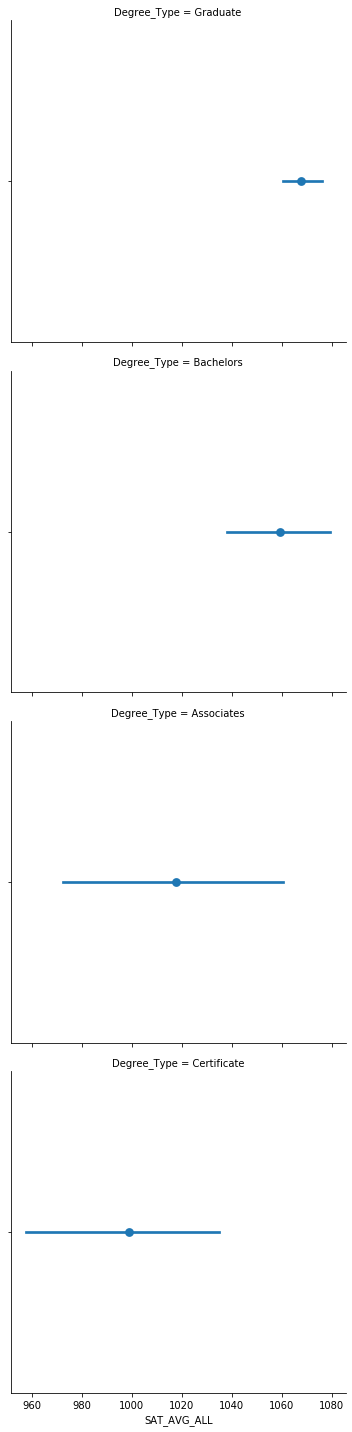

In [10]:
# Create a facetted pointplot of Average SAT_AVG_ALLl scores facetted by Degree_Type
sns.catplot(data=df,
              x='SAT_AVG_ALL',
              kind='point',
              row='Degree_Type',
              row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

### Using lmplot

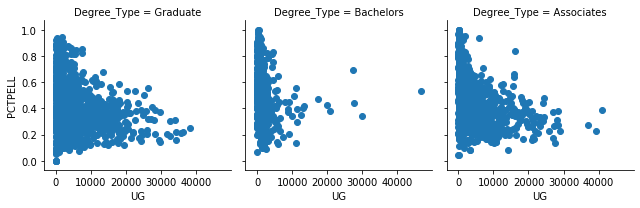

In [12]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
degree_ord = ['Graduate', 'Bachelors', 'Associates']
g = sns.FacetGrid(df, col='Degree_Type', col_order=degree_ord)

# Map a scatterplot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

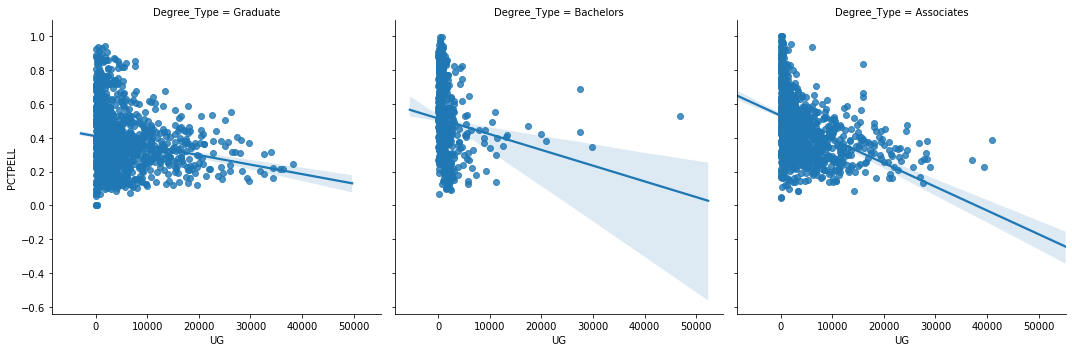

In [14]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
          x='UG',
          y='PCTPELL',
          col='Degree_Type',
          col_order=degree_ord)

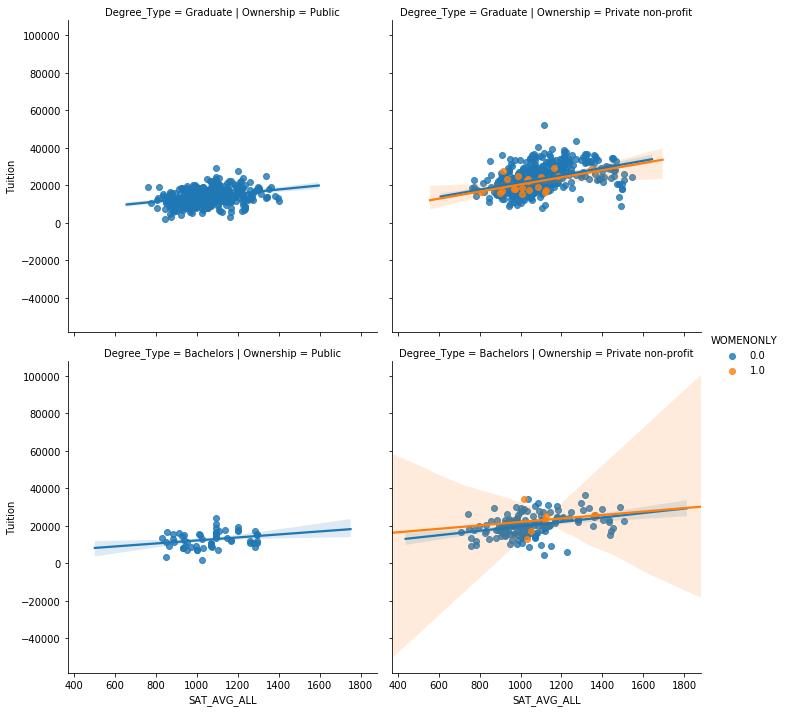

In [15]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
inst_ord = ['Public', 'Private non-profit']
sns.lmplot(data=df,
          x='SAT_AVG_ALL',
          y='Tuition',
          col='Ownership',
          row='Degree_Type',
          row_order=['Graduate', 'Bachelors'],
          hue='WOMENONLY',
          col_order=inst_ord)

## Using PairGrid and pairplot


In [16]:
df = pd.read_csv('./dataset/insurance_premiums.csv')

### Building a PairGrid

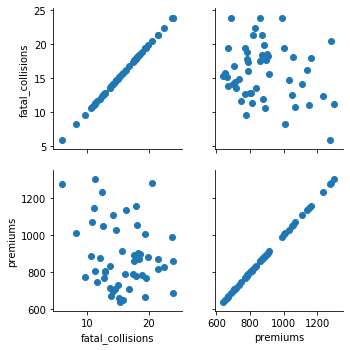

In [17]:
# Create a PairGrid with a scatterplot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=['fatal_collisions', 'premiums'])
g2 = g.map(plt.scatter)

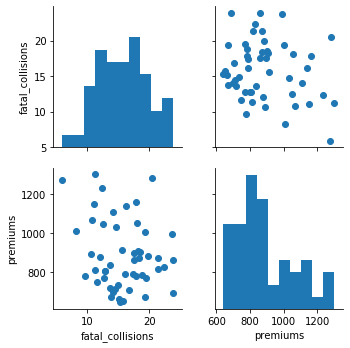

In [19]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=['fatal_collisions', 'premiums'])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

### Using a pairplot


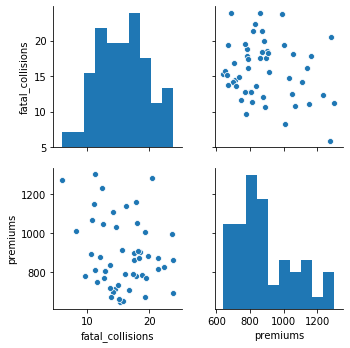

In [20]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
            vars=['fatal_collisions', 'premiums'],
             kind='scatter'
            )

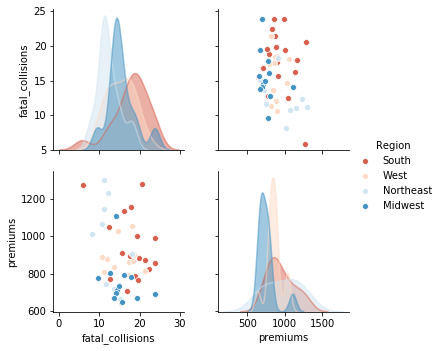

In [21]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
            vars=['fatal_collisions', 'premiums'],
            kind='scatter',
            hue='Region',
            palette='RdBu',
            diag_kws={'alpha':.5})

### Additional pairplots

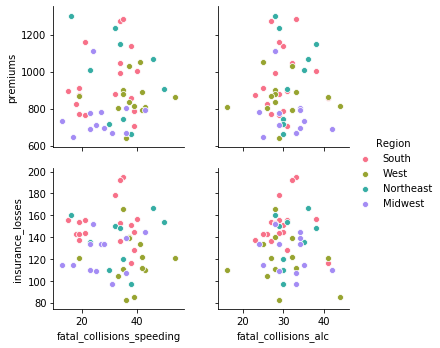

In [22]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
            x_vars=['fatal_collisions_speeding', 'fatal_collisions_alc'],
            y_vars=['premiums', 'insurance_losses'],
            kind='scatter',
            hue='Region',
            palette='husl')

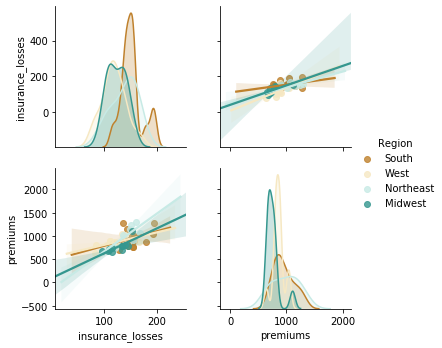

In [23]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
            vars=['insurance_losses', 'premiums'],
            kind='reg',
            palette='BrBG',
            diag_kind='kde',
            hue='Region')

## Using JointGrid and jointplot

In [24]:
df = pd.read_csv('./dataset/bike_share.csv')

### Building a JointGrid and jointplot

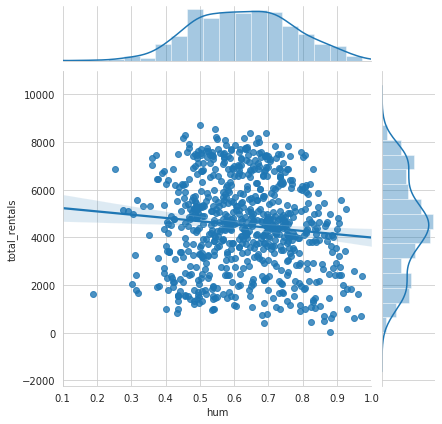

In [25]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style('whitegrid')
g = sns.JointGrid(x='hum',
                 y='total_rentals',
                 data=df,
                 xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.distplot)

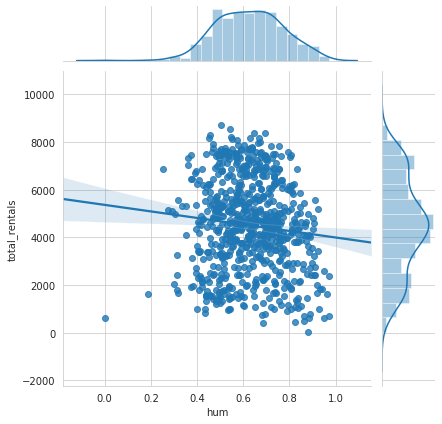

In [26]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x='hum',
             y='total_rentals',
             kind='reg',
             data=df)

### Jointplots and regression

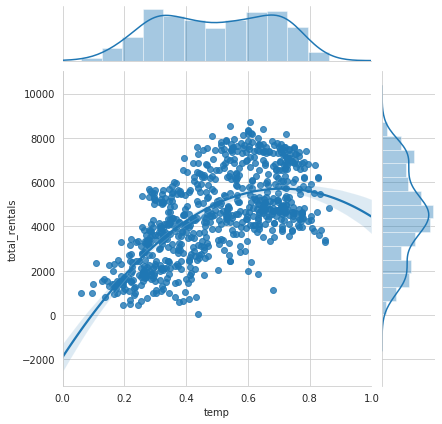

In [27]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x='temp',
             y='total_rentals',
             kind='reg',
             data=df,
             order=2,
             xlim=(0, 1))

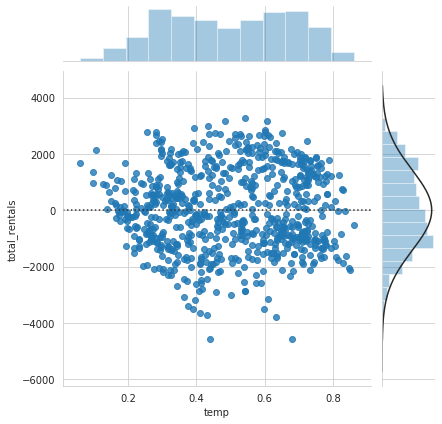

In [28]:
# Plot a jointplot showing the residuals
sns.jointplot(x='temp',
             y='total_rentals',
             kind='resid',
             data=df,
             order=2)

### Complex jointplots

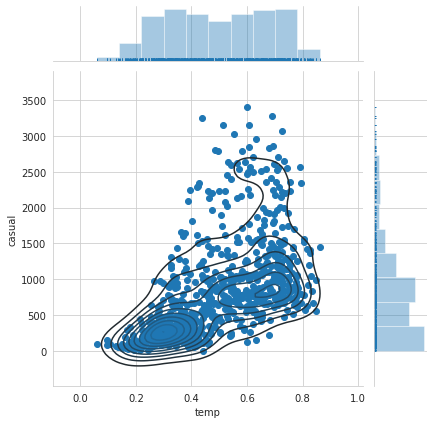

In [29]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x='temp',
                  y='casual',
                  kind='scatter',
                  data=df,
                  marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

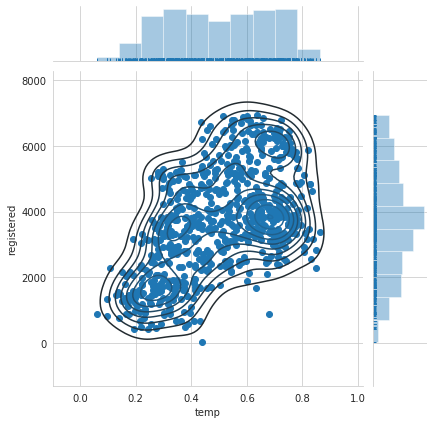

In [30]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x='temp',
                  y='registered',
                  kind='scatter',
                  data=df,
                  marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))